# Imports

In [15]:
import numpy as np 
import matplotlib.pyplot as plt

# Auxiliary Functions

In [16]:
def display_images(images_array):
    """
    Displays images contained in a numpy array with shape (N, H, W, C) or (N, H, W).

    Parameters:
    - images_array (numpy.ndarray): An array containing the images. 
      Must have shape (N, H, W, C) for RGB images or (N, H, W) for grayscale images.

    Note:
    - The number of images, N, must be < 1000.
    """
    num_images = images_array.shape[0]

    # Determine the number of rows and columns for the grid
    cols = min(10, num_images)  # Maximum of 10 images per row
    rows = (num_images + cols - 1) // cols  # Calculate the required number of rows

    # Set up the figure
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for i in range(rows * cols):
        if i < num_images:
            image = images_array[i]
            if len(image.shape) == 2:  # Grayscale image
                axes[i].imshow(image, cmap="gray")
            else:  # RGB image
                axes[i].imshow(image)
            axes[i].axis("off")
        else:
            axes[i].axis("off")  # Hide axes for empty cells

    plt.tight_layout()
    plt.show()

# Load Dataset

In [17]:
data = np.load('/kaggle/input/datasetoriginale/mars_for_students.npz')

In [18]:
#show how dataset keys are named
print(data.keys)

<bound method Mapping.keys of NpzFile '/kaggle/input/datasetoriginale/mars_for_students.npz' with keys: training_set, test_set>


In [19]:
training_set = data["training_set"]
test_set = data["test_set"]

In [20]:
print(training_set.shape)
print(test_set.shape)

(2615, 2, 64, 128)
(10022, 64, 128)


In [21]:
#Separate images from masks
images = training_set[:,0,:,:]
masks = training_set[:,1,:,:]
print(images.shape)
print(masks.shape)

(2615, 64, 128)
(2615, 64, 128)


# General View

In [ ]:
display_images(images[:100])

# Spot Outliers

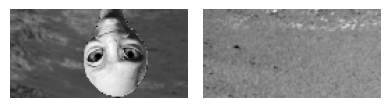

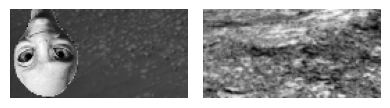

In [23]:
#Outliers images
display_images(images[62:64])
display_images(images[79:81])

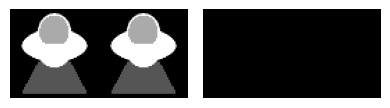

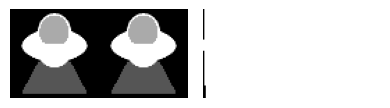

In [24]:
#Outliers masks
display_images(masks[62:64])
display_images(masks[79:81])

# Remove outliers

In [25]:
#Find the indices of the masks with the same outliers mask
matches = np.array([np.array_equal(mask, masks[62]) for mask in masks])
#Count how many of them we found
count = np.sum(matches)
print(f"Found {count}")

Found 110


In [26]:
#Remove such indexes from images and masks
clean_masks = masks[~matches]
clean_images= images[~matches]

#Print how many images remains
print(masks.shape)
print(clean_masks.shape)

(2615, 64, 128)
(2505, 64, 128)


# Last global checks

In [ ]:
display_images(clean_images[0:500])

In [ ]:
display_images(clean_images[500:1000])

In [ ]:
display_images(clean_images[1000:1500])

In [ ]:
display_images(clean_images[1500:2000])

In [ ]:
display_images(clean_images[2000:])

# Plot some Test set images

In [ ]:
display_images(test_set[419:540])

# Save the cleaned dataset

In [33]:
np.savez_compressed('mars_for_students_cleaned_compressed.npz', 
                    images=clean_images, 
                    labels=clean_masks, 
                    test_set=test_set)